In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Create 3D simulation of sphere

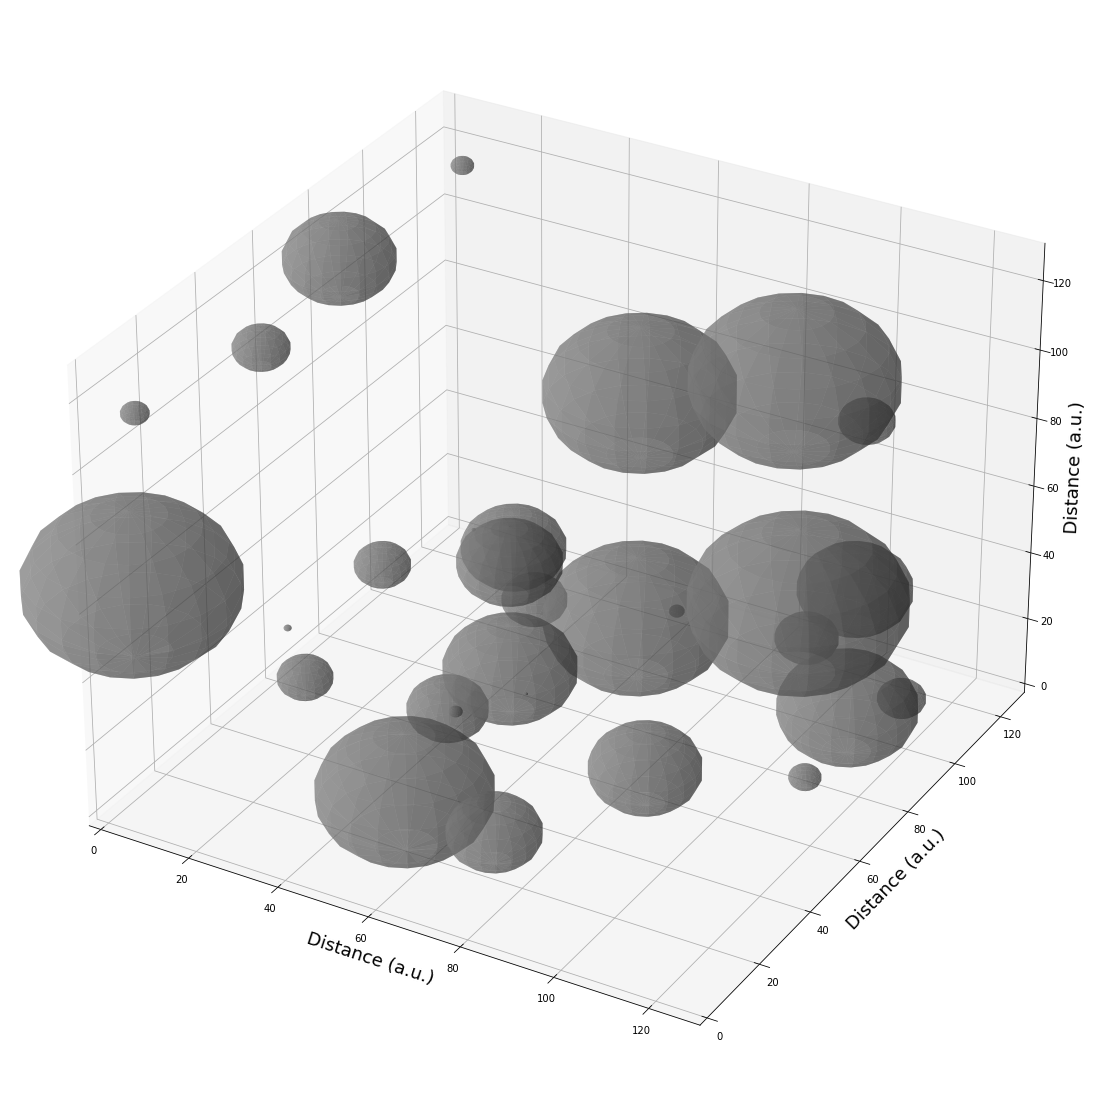

In [6]:


def drawSphere(xCenter, yCenter, zCenter, r):
    #draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x=np.cos(u)*np.sin(v)
    y=np.sin(u)*np.sin(v)
    z=np.cos(v)
    # shift and scale sphere
    x = r*x + xCenter
    y = r*y + yCenter
    z = r*z + zCenter
    return (x,y,z)

def draw1Dprofile(ri,xi,FoV,space_sz):
    x=np.arange((-space_sz/2),space_sz/2,1,dtype=np.single)
    radius_sq=ri**2
    projection1d=3.14*(radius_sq-np.power(x, 2))
    projection1d=np.where(projection1d<=0,0,projection1d)
    shift=int(xi)
    #print(shift)
    nbubble=np.roll(projection1d, shift)
    return nbubble

n_sph=30
space_sz=128
x = (space_sz)*np.random.rand(n_sph)
y = (space_sz)*np.random.rand(n_sph)
z = (space_sz)*np.random.rand(n_sph)
r = (space_sz/6)*np.random.rand(n_sph)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

FoV= np.zeros(space_sz, dtype=np.single)
# draw a sphere for each data point
for (xi,yi,zi,ri) in zip(x,y,z,r):
    (xs,ys,zs) = drawSphere(xi,yi,zi,ri)
    ax.plot_surface(xs, ys, zs, color="grey",alpha=0.5)
    FoV+=draw1Dprofile(ri,xi,FoV,space_sz)



ax.set_xlabel("Distance (a.u.)", fontsize=18, rotation = 0)
ax.set_ylabel("Distance (a.u.)", fontsize=18, rotation = 0)
ax.set_zlabel("Distance (a.u.)", fontsize=18, rotation = 0)    
ax.set_xlim(0, space_sz)
ax.set_ylim(0, space_sz)
ax.set_zlim(0, space_sz)
plt.savefig("figures/Random3DSpheresPlot", bbox_inches='tight')
plt.show()


### Create 1D Profile of sphere(s) created above

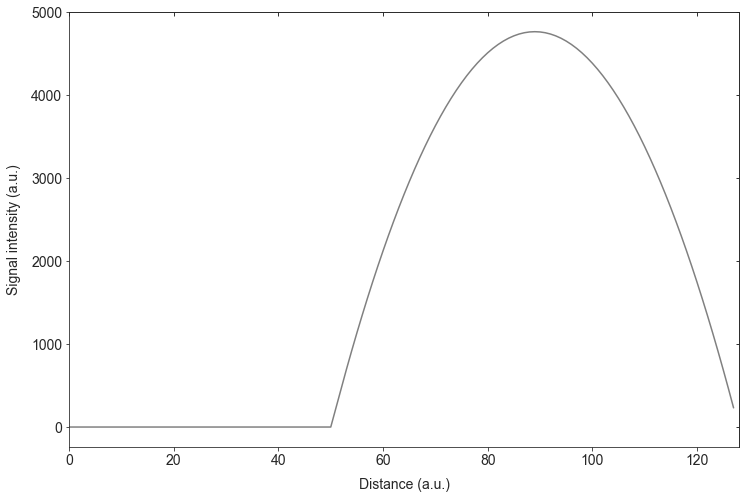

In [4]:
sns.set_style("ticks", {"xtick.major.size": 200, "ytick.major.size": 1})

fig, ax = plt.subplots(figsize=(12,8))

#Create real 1D pace dataframe
x=np.arange(0,space_sz,1,dtype=np.single)
real_df=pd.DataFrame({'signal':FoV,'space':x})

#Change tick mark labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Create actual seborn graph
graph=sns.lineplot(data=real_df, x="space", y='signal',color='grey')#, fit_reg=False


#Change axis labels
plt.xlabel("Distance (a.u.)",fontsize=14, labelpad=10)
plt.ylabel("Signal intensity (a.u.)",fontsize=14, labelpad=10)

# control x and y limits
plt.xlim(0,space_sz)



#specify secondary axis similar to primary repeat all that we did above
#Xaxis first
secax = ax.secondary_xaxis('top')
secax.set_xlim([0, space_sz])
secax.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
secax.set_xticklabels([]);

#Yaxis second
secax2 = ax.secondary_yaxis('right')
secax2.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
secax2.set_yticklabels([]);
